# -------------------------------------------------------------------
# ПРОЕКТ: АНАЛИЗ РЫНКА ТРУДА (IT-ВАКАНСИИ)
# -------------------------------------------------------------------
# Импорт библиотек и подключение к базе данных
# -------------------------------------------------------------------

In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

# Параметры подключения
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)
# Создаем соединение
connection = psycopg2.connect(**DB_CONFIG)
print("✅ Подключение к базе данных установлено")

✅ Подключение к базе данных установлено


# -------------------------------------------------------------------
# БЛОК 1: ОБЩАЯ СТАТИСТИКА БАЗЫ ДАННЫХ
# -------------------------------------------------------------------
# Задание 1.1: Количество вакансий
# -------------------------------------------------------------------

In [ ]:
df_vacancies = pd.read_sql_query("SELECT COUNT(*) AS vacancies_count FROM public.vacancies;", connection)
print("📊 Количество вакансий:")
print(df_vacancies)

📊 Количество вакансий:
   vacancies_count
0            49197


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\2766312747.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vacancies = pd.read_sql_query("SELECT COUNT(*) AS vacancies_count FROM public.vacancies;", connection)


# -------------------------------------------------------------------
# Задание 1.2: Количество работодателей
# -------------------------------------------------------------------

In [ ]:
df_employers = pd.read_sql_query("SELECT COUNT(*) AS employers_count FROM public.employers;", connection)
print("\n📊 Количество работодателей:")
print(df_employers)


📊 Количество работодателей:
   employers_count
0            23501


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\422711498.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers = pd.read_sql_query("SELECT COUNT(*) AS employers_count FROM public.employers;", connection)


# -------------------------------------------------------------------
# Задание 1.3: Количество регионов
# -------------------------------------------------------------------

In [ ]:
df_areas = pd.read_sql_query("SELECT COUNT(*) AS areas_count FROM public.areas;", connection)
print("\n📊 Количество регионов:")
print(df_areas)


📊 Количество регионов:
   areas_count
0         1362


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\2030600382.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_areas = pd.read_sql_query("SELECT COUNT(*) AS areas_count FROM public.areas;", connection)


# -------------------------------------------------------------------
# Задание 1.4: Количество сфер деятельности
# -------------------------------------------------------------------

In [ ]:
df_industries = pd.read_sql_query("SELECT COUNT(*) AS industries_count FROM public.industries;", connection)
print("\n📊 Количество сфер деятельности:")
print(df_industries)


📊 Количество сфер деятельности:
   industries_count
0               294


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\374782048.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_industries = pd.read_sql_query("SELECT COUNT(*) AS industries_count FROM public.industries;", connection)


# -------------------------------------------------------------------
# Визуализация: Общая статистика базы данных
# -------------------------------------------------------------------

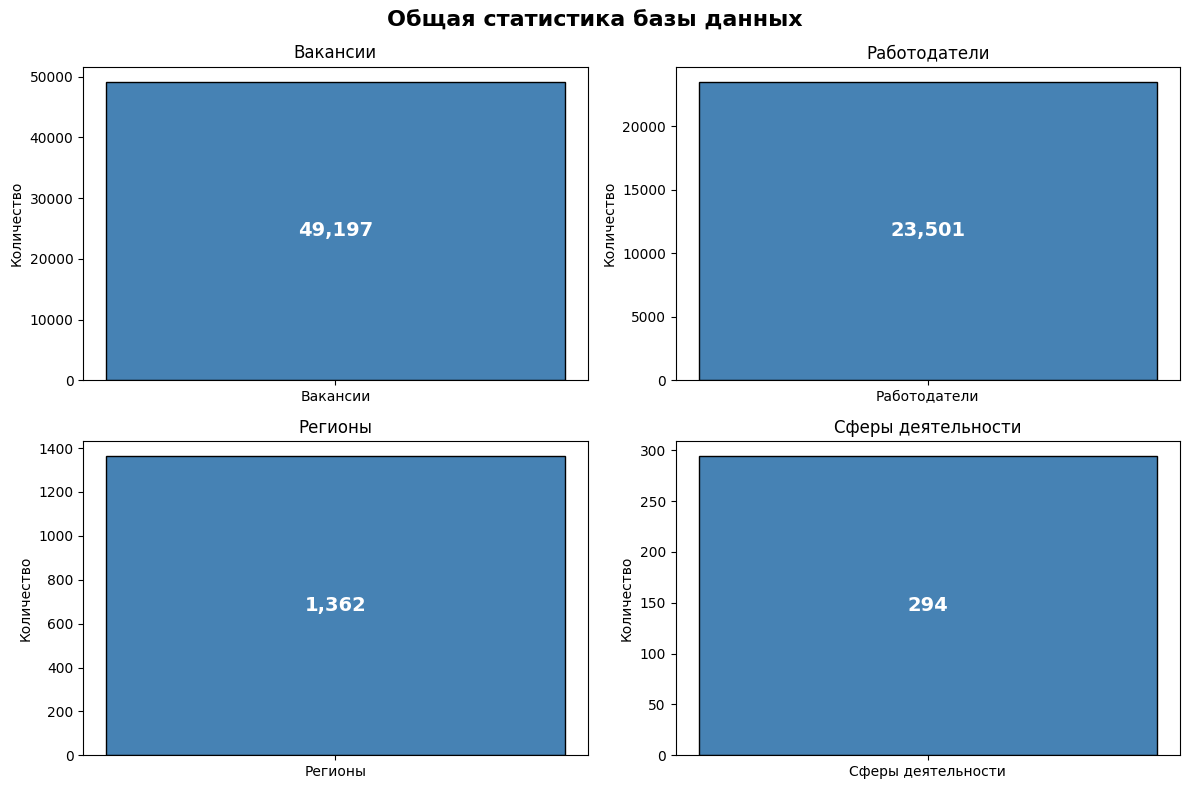

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Общая статистика базы данных', fontsize=16, fontweight='bold')

metrics = [
    (df_vacancies, 'vacancies_count', 'Вакансии', axes[0, 0]),
    (df_employers, 'employers_count', 'Работодатели', axes[0, 1]),
    (df_areas, 'areas_count', 'Регионы', axes[1, 0]),
    (df_industries, 'industries_count', 'Сферы деятельности', axes[1, 1])
]

for df, col, title, ax in metrics:
    value = df.iloc[0][col]
    ax.bar([title], [value], color='steelblue', edgecolor='black')
    ax.set_title(title, fontsize=12)
    ax.text(0, value/2, f'{value:,}', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.set_ylabel('Количество')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Краткий вывод по блоку 1
# -------------------------------------------------------------------

In [ ]:
# Правильные способы доступа к данным в DataFrame
print("=" * 60)
print("📊 ОБЩАЯ СТАТИСТИКА:")
print("=" * 60)

# Способ 1: через .iloc с одним индексом
print(f"• Вакансий: {df_vacancies.iloc[0, 0]:,}")  # или df_vacancies.iloc[0]['vacancies_count']

# Способ 2: через .loc
print(f"• Работодателей: {df_employers.loc[0, 'employers_count']:,}")

# Способ 3: через .values
print(f"• Регионов: {df_areas.values[0][0]:,}")

# Способ 4: через .iat (самый быстрый для одного значения)
print(f"• Сфер деятельности: {df_industries.iat[0, 0]:,}")

print("→ Данные охватывают широкий спектр, база нормализована и готова к анализу.\n")

📊 ОБЩАЯ СТАТИСТИКА:
• Вакансий: 49,197
• Работодателей: 23,501
• Регионов: 1,362
• Сфер деятельности: 294
→ Данные охватывают широкий спектр, база нормализована и готова к анализу.



# -------------------------------------------------------------------
# БЛОК 2: АНАЛИЗ ВАКАНСИЙ
# -------------------------------------------------------------------
# Задание 2.1: Топ-5 регионов по количеству вакансий
# -------------------------------------------------------------------

In [ ]:
df_regions = pd.read_sql_query("""
    SELECT a.name AS region, COUNT(v.id) AS vacancies
    FROM public.vacancies v
    JOIN public.areas a ON v.area_id = a.id
    GROUP BY a.name
    ORDER BY vacancies DESC
    LIMIT 5;
""", connection)

print("📊 Топ-5 регионов по количеству вакансий:")
print(df_regions)

📊 Топ-5 регионов по количеству вакансий:
            region  vacancies
0           Москва       5333
1  Санкт-Петербург       2851
2            Минск       2112
3      Новосибирск       2006
4           Алматы       1892


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\10950790.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_regions = pd.read_sql_query("""


# Визуализация: Топ-5 регионов
# -------------------------------------------------------------------

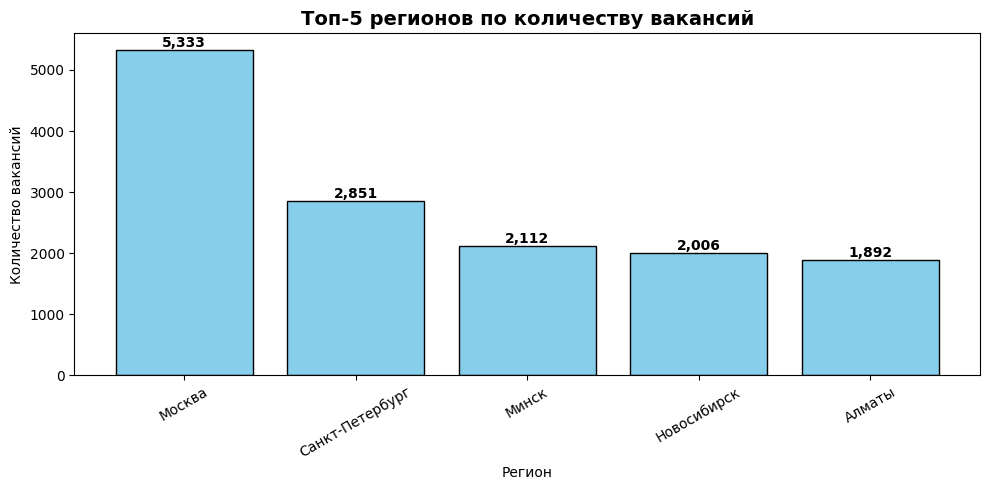

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(df_regions['region'], df_regions['vacancies'], color='skyblue', edgecolor='black')
plt.title('Топ-5 регионов по количеству вакансий', fontsize=14, fontweight='bold')
plt.xlabel('Регион')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=30)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Задание 2.2: Наличие информации о зарплате
# -------------------------------------------------------------------

In [ ]:
df_salary_info = pd.read_sql_query("""
    SELECT COUNT(*) AS with_salary
    FROM public.vacancies
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL;
""", connection)

total = 49197

# ✅ Самый надежный способ
with_salary = df_salary_info['with_salary'][0]  # прямое обращение по имени колонки и индексу
without_salary = total - with_salary

print("=" * 50)
print("📊 ИНФОРМАЦИЯ О ЗАРПЛАТЕ")
print("=" * 50)
print(f"✅ С зарплатой:  {with_salary:>10,}  ({with_salary/total*100:>5.1f}%)")
print(f"❌ Без зарплаты: {without_salary:>10,}  ({without_salary/total*100:>5.1f}%)")
print("-" * 50)
print(f"📌 Всего:        {total:>10,}  (100%)")
print("=" * 50)

📊 ИНФОРМАЦИЯ О ЗАРПЛАТЕ
✅ С зарплатой:      24,073  ( 48.9%)
❌ Без зарплаты:     25,124  ( 51.1%)
--------------------------------------------------
📌 Всего:            49,197  (100%)


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\146008095.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary_info = pd.read_sql_query("""


# Визуализация: Наличие зарплаты
# -------------------------------------------------------------------

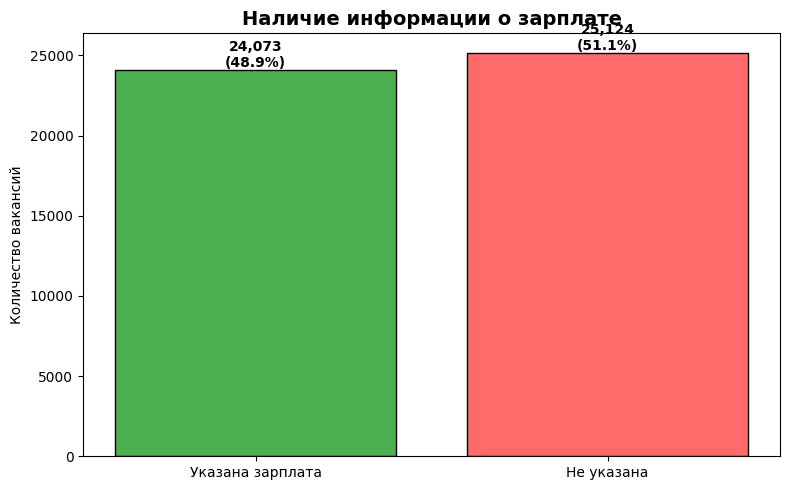

In [ ]:
plt.figure(figsize=(8, 5))
bars = plt.bar(['Указана зарплата', 'Не указана'], [with_salary, without_salary], 
               color=['#4CAF50', '#FF6B6B'], edgecolor='black')
plt.title('Наличие информации о зарплате', fontsize=14, fontweight='bold')
plt.ylabel('Количество вакансий')

for bar, val in zip(bars, [with_salary, without_salary]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{val:,}\n({val/total*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Задание 2.3: Средние значения зарплат
# -------------------------------------------------------------------

In [ ]:
df_avg_salary = pd.read_sql_query("""
    SELECT ROUND(AVG(salary_from)) AS salary_from, ROUND(AVG(salary_to)) AS salary_to
    FROM public.vacancies;
""", connection)

print("📊 Средние значения зарплат:")
print(df_avg_salary)

📊 Средние значения зарплат:
   salary_from  salary_to
0      71065.0   110537.0


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\1808638006.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_salary = pd.read_sql_query("""


# Визуализация: Средние зарплаты
# -------------------------------------------------------------------

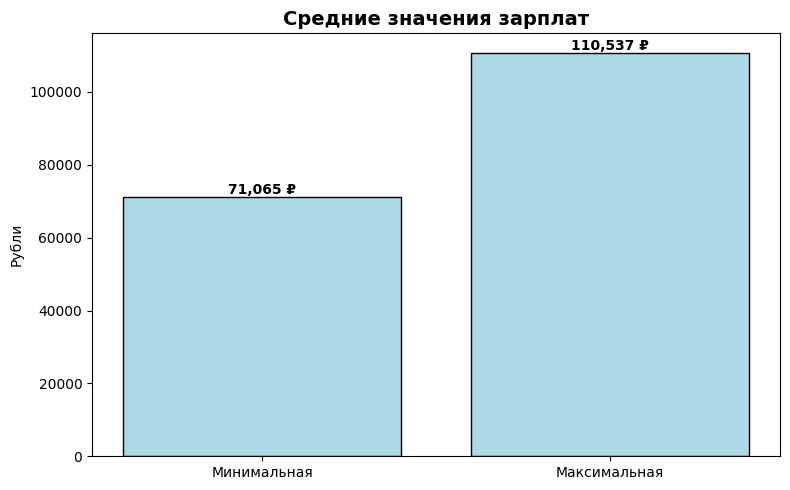

In [ ]:
plt.figure(figsize=(8, 5))
bars = plt.bar(['Минимальная', 'Максимальная'], 
               [df_avg_salary['salary_from'].iloc[0], df_avg_salary['salary_to'].iloc[0]], 
               color='lightblue', edgecolor='black')
plt.title('Средние значения зарплат', fontsize=14, fontweight='bold')
plt.ylabel('Рубли')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,} ₽', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Задание 2.4: Форматы занятости
# -------------------------------------------------------------------

In [ ]:
df_employment = pd.read_sql_query("""
    SELECT schedule, employment, COUNT(*) AS cnt
    FROM public.vacancies
    GROUP BY schedule, employment
    ORDER BY cnt DESC
    LIMIT 5;
""", connection)

df_employment['format'] = df_employment['schedule'].fillna('Не указано') + ' / ' + df_employment['employment'].fillna('Не указано')
print("📊 Топ-5 форматов занятости:")
print(df_employment[['schedule', 'employment', 'cnt']])

📊 Топ-5 форматов занятости:
           schedule           employment    cnt
0       Полный день     Полная занятость  35367
1  Удаленная работа     Полная занятость   7802
2     Гибкий график     Полная занятость   1593
3  Удаленная работа  Частичная занятость   1312
4    Сменный график     Полная занятость    940


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\2377137463.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employment = pd.read_sql_query("""


# Визуализация: Форматы занятости
# -------------------------------------------------------------------

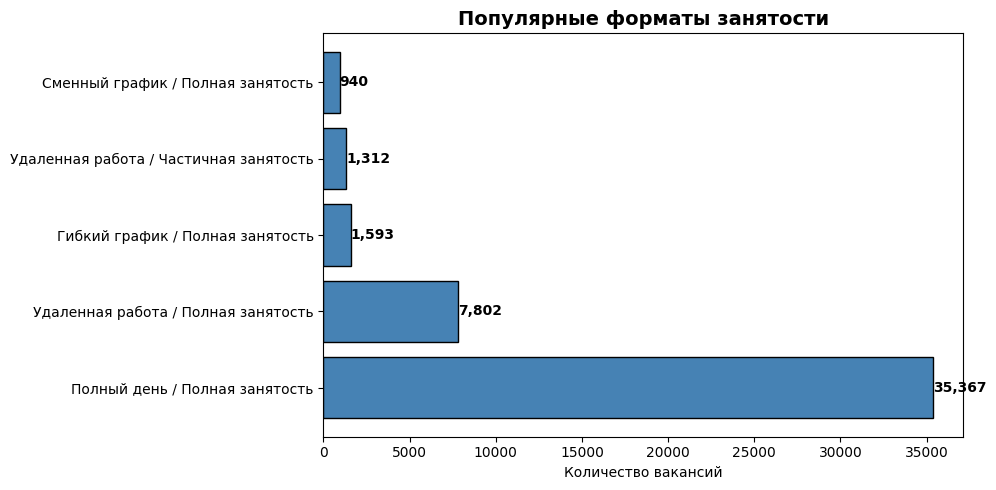

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.barh(df_employment['format'], df_employment['cnt'], color='steelblue', edgecolor='black')
plt.title('Популярные форматы занятости', fontsize=14, fontweight='bold')
plt.xlabel('Количество вакансий')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', 
             ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Задание 2.5: Распределение по опыту работы
# -------------------------------------------------------------------

In [ ]:
df_experience = pd.read_sql_query("""
    SELECT experience, COUNT(*) AS cnt
    FROM public.vacancies
    GROUP BY experience
    ORDER BY cnt;
""", connection)

print("📊 Распределение вакансий по опыту работы:")
print(df_experience)

📊 Распределение вакансий по опыту работы:
           experience    cnt
0         Более 6 лет   1337
1           Нет опыта   7197
2       От 3 до 6 лет  14511
3  От 1 года до 3 лет  26152


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\1466842792.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_experience = pd.read_sql_query("""


# Визуализация: Опыт работы
# -------------------------------------------------------------------

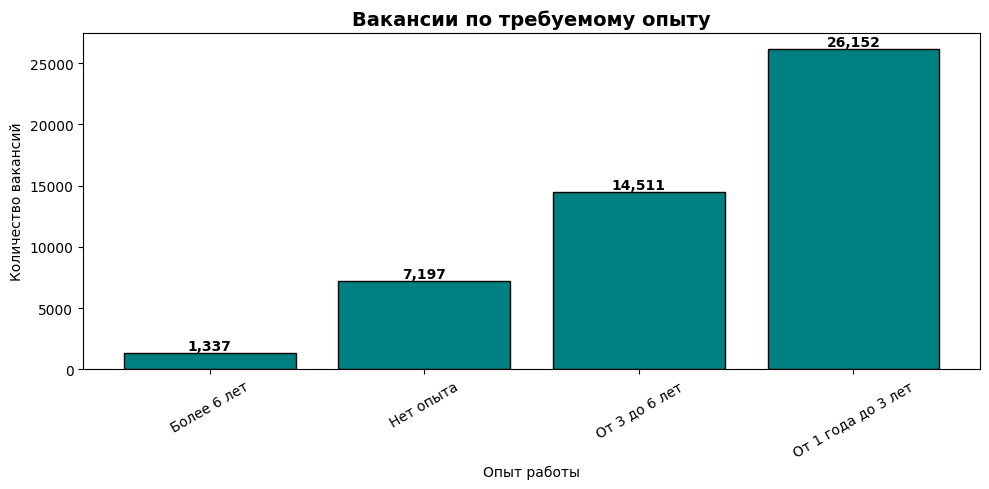

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(df_experience['experience'], df_experience['cnt'], color='teal', edgecolor='black')
plt.title('Вакансии по требуемому опыту', fontsize=14, fontweight='bold')
plt.xlabel('Опыт работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=30)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Краткий вывод по блоку 2
# -------------------------------------------------------------------

In [ ]:
print("="*60)
print("📊 АНАЛИЗ ВАКАНСИЙ:")
print("="*60)
print("• Регионы-лидеры: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы")
print(f"• Зарплата указана в {with_salary/total*100:.1f}% вакансий")
print(f"• Средняя зарплата: от {df_avg_salary['salary_from'].iloc[0]:,.0f} до {df_avg_salary['salary_to'].iloc[0]:,.0f} ₽")
print("• Самый популярный формат: удалёнка / полная занятость")
print("• Большинство вакансий требует опыта, но есть возможности для начинающих\n")

📊 АНАЛИЗ ВАКАНСИЙ:
• Регионы-лидеры: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы
• Зарплата указана в 48.9% вакансий
• Средняя зарплата: от 71,065 до 110,537 ₽
• Самый популярный формат: удалёнка / полная занятость
• Большинство вакансий требует опыта, но есть возможности для начинающих



# -------------------------------------------------------------------
# БЛОК 3: АНАЛИЗ РАБОТОДАТЕЛЕЙ
# -------------------------------------------------------------------
# Задание 3.1: Топ-5 работодателей по количеству вакансий
# -------------------------------------------------------------------

In [ ]:
df_top_employers = pd.read_sql_query("""
    SELECT e.name AS employer, COUNT(v.id) AS vacancies
    FROM public.vacancies v
    JOIN public.employers e ON v.employer_id = e.id
    GROUP BY e.name
    ORDER BY vacancies DESC
    LIMIT 5;
""", connection)

print("📊 Топ-5 работодателей по числу вакансий:")
print(df_top_employers)

📊 Топ-5 работодателей по числу вакансий:
        employer  vacancies
0         Яндекс       1933
1     Ростелеком        491
2       Тинькофф        444
3           СБЕР        428
4  Газпром нефть        331


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\215132662.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_employers = pd.read_sql_query("""


# Визуализация: Топ-5 работодателей
# -------------------------------------------------------------------

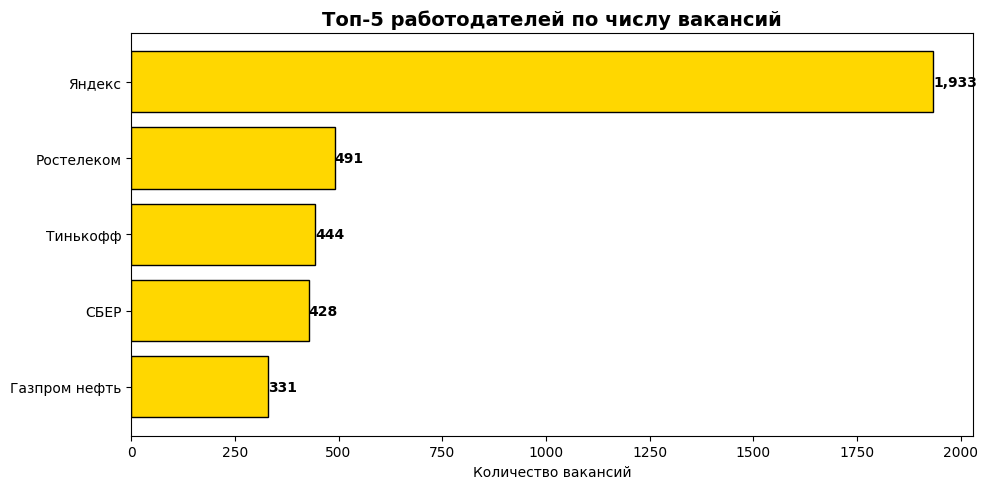

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.barh(df_top_employers['employer'], df_top_employers['vacancies'], color='gold', edgecolor='black')
plt.title('Топ-5 работодателей по числу вакансий', fontsize=14, fontweight='bold')
plt.xlabel('Количество вакансий')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', 
             ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Задание 3.2: Регионы с работодателями, но без вакансий
# -------------------------------------------------------------------

In [ ]:
df_regions_no_vacancies = pd.read_sql_query("""
    SELECT a.name AS region, COUNT(e.id) AS employers
    FROM public.areas a
    JOIN public.employers e ON e.area = a.id
    WHERE a.id NOT IN (SELECT DISTINCT area_id FROM public.vacancies)
    GROUP BY a.name
    ORDER BY employers DESC
    LIMIT 10;
""", connection)

print("📊 Топ-10 регионов с работодателями, но без вакансий:")
print(df_regions_no_vacancies)

📊 Топ-10 регионов с работодателями, но без вакансий:
                  region  employers
0                 Россия        410
1              Казахстан        207
2     Московская область         75
3     Краснодарский край         19
4               Беларусь         18
5     Ростовская область         18
6            Азербайджан         17
7  Нижегородская область         16
8   Республика Татарстан         16
9             Узбекистан         15


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\3066443711.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_regions_no_vacancies = pd.read_sql_query("""


# Визуализация: Регионы без вакансий
# -------------------------------------------------------------------

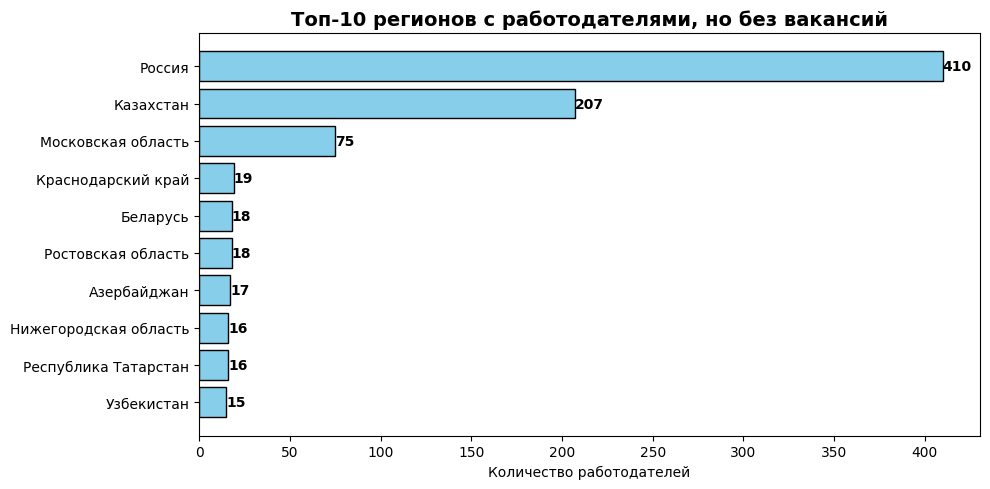

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.barh(df_regions_no_vacancies['region'], df_regions_no_vacancies['employers'], 
                color='skyblue', edgecolor='black')
plt.title('Топ-10 регионов с работодателями, но без вакансий', fontsize=14, fontweight='bold')
plt.xlabel('Количество работодателей')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', 
             ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Задание 3.3: Максимальное количество регионов у одного работодателя
# -------------------------------------------------------------------

In [ ]:
df_max_regions = pd.read_sql_query("""
    SELECT MAX(regions_count) AS max_regions
    FROM (
        SELECT employer_id, COUNT(DISTINCT area_id) AS regions_count
        FROM public.vacancies
        GROUP BY employer_id
    ) AS sub;
""", connection)

# ✅ ИСПРАВЛЕНО: используем имя колонки
max_regions = df_max_regions['max_regions'][0]
print(f"📊 Максимальное число регионов у одного работодателя: {max_regions}")

📊 Максимальное число регионов у одного работодателя: 181


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\2434411774.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_max_regions = pd.read_sql_query("""


# -------------------------------------------------------------------
# Задание 3.4: Работодатели без указания сферы деятельности
# -------------------------------------------------------------------

In [ ]:
df_without_industry = pd.read_sql_query("""
    SELECT COUNT(*) AS without_industry
    FROM public.employers e
    LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id
    WHERE ei.industry_id IS NULL;
""", connection)

df_total_emp = pd.read_sql_query("SELECT COUNT(*) AS total FROM public.employers;", connection)

without = df_without_industry['without_industry'][0]
total_emp = df_total_emp['total'][0]
with_industry = total_emp - without

# Создаем прогресс-бар
bar_width = 40
with_bar = '█' * int((with_industry / total_emp) * bar_width)
without_bar = '█' * int((without / total_emp) * bar_width)

print("=" * 60)
print("📊 РАСПРЕДЕЛЕНИЕ РАБОТОДАТЕЛЕЙ ПО НАЛИЧИЮ СФЕРЫ ДЕЯТЕЛЬНОСТИ")
print("=" * 60)
print(f"✅ Сфера указана:   {with_bar:<40} {with_industry:6,} ({with_industry/total_emp*100:5.1f}%)")
print(f"❌ Сфера не указана: {without_bar:<40} {without:6,} ({without/total_emp*100:5.1f}%)")
print("-" * 60)
print(f"📌 Всего: {'░' * 40} {total_emp:6,} (100%)")
print("=" * 60)

📊 РАСПРЕДЕЛЕНИЕ РАБОТОДАТЕЛЕЙ ПО НАЛИЧИЮ СФЕРЫ ДЕЯТЕЛЬНОСТИ
✅ Сфера указана:   █████████████████████████                15,082 ( 64.2%)
❌ Сфера не указана: ██████████████                            8,419 ( 35.8%)
------------------------------------------------------------
📌 Всего: ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 23,501 (100%)


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\1296440914.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_without_industry = pd.read_sql_query("""
C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\1296440914.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_total_emp = pd.read_sql_query("SELECT COUNT(*) AS total FROM public.employers;", connection)


# Визуализация: Наличие сферы деятельности
# -------------------------------------------------------------------

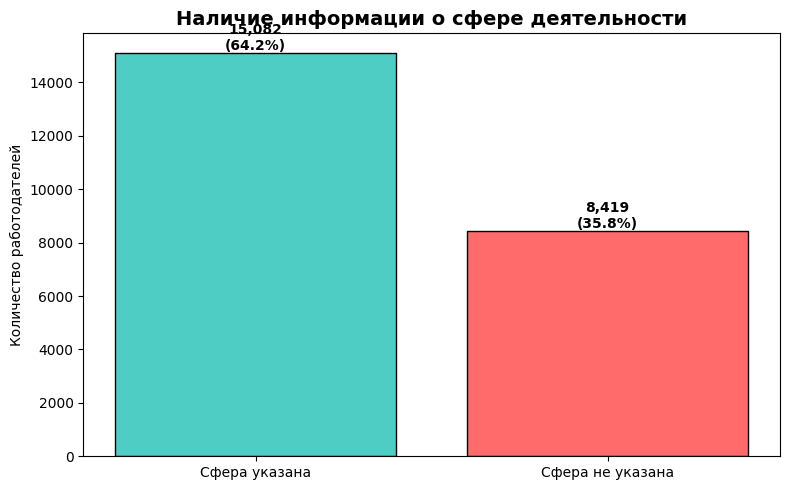

In [ ]:
plt.figure(figsize=(8, 5))
bars = plt.bar(['Сфера указана', 'Сфера не указана'], [with_industry, without], 
               color=['#4ECDC4', '#FF6B6B'], edgecolor='black')
plt.title('Наличие информации о сфере деятельности', fontsize=14, fontweight='bold')
plt.ylabel('Количество работодателей')

for bar, val in zip(bars, [with_industry, without]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{val:,}\n({val/total_emp*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Задание 3.5: Компания на 3-м месте в алфавитном списке (4 сферы)
# -------------------------------------------------------------------

In [ ]:
df_company_3rd = pd.read_sql_query("""
    SELECT e.name
    FROM public.employers e
    JOIN public.employers_industries ei ON e.id = ei.employer_id
    GROUP BY e.id, e.name
    HAVING COUNT(ei.industry_id) = 4
    ORDER BY e.name
    LIMIT 3;
""", connection)

print("📊 Топ-3 компании с 4 сферами деятельности (по алфавиту):")
print(df_company_3rd)

if len(df_company_3rd) >= 3:
    print(f"🏆 Компания на 3-м месте: {df_company_3rd.iloc[2]['name']}")

C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\1711228184.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_company_3rd = pd.read_sql_query("""


📊 Топ-3 компании с 4 сферами деятельности (по алфавиту):
           name
0  101 Интернет
1      21vek.by
2          2ГИС
🏆 Компания на 3-м месте: 2ГИС


# -------------------------------------------------------------------
# Задание 3.6: Топ-3 сферы деятельности по числу работодателей
# -------------------------------------------------------------------

In [ ]:
df_top_industries = pd.read_sql_query("""
    SELECT i.name AS industry, COUNT(DISTINCT ei.employer_id) AS employers
    FROM public.employers_industries ei
    JOIN public.industries i ON ei.industry_id = i.id
    GROUP BY i.name
    ORDER BY employers DESC
    LIMIT 3;
""", connection)

print("📊 Топ-3 сферы деятельности по числу работодателей:")
print(df_top_industries)

C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\4065293872.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_industries = pd.read_sql_query("""


📊 Топ-3 сферы деятельности по числу работодателей:
                                            industry  employers
0                Разработка программного обеспечения       3553
1  Системная интеграция,  автоматизации технологи...       2993
2  Интернет-компания (поисковики, платежные систе...       1675


# Визуализация: Топ-3 сферы деятельности
# -------------------------------------------------------------------

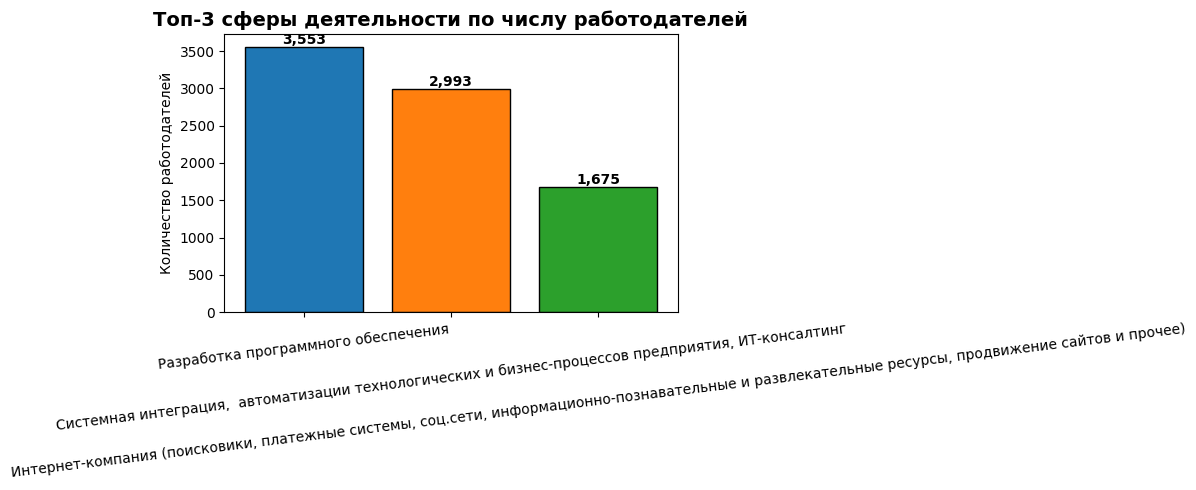

In [ ]:
plt.figure(figsize=(10, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars = plt.bar(df_top_industries['industry'], df_top_industries['employers'], 
               color=colors, edgecolor='black')
plt.title('Топ-3 сферы деятельности по числу работодателей', fontsize=14, fontweight='bold')
plt.ylabel('Количество работодателей')
plt.xticks(rotation=7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Задание 3.7: Вакансии Яндекса в городах-миллионниках
# -------------------------------------------------------------------

In [ ]:
df_yandex = pd.read_sql_query("""
    WITH million_cities AS (
        SELECT a.name
        FROM public.vacancies v
        JOIN public.employers e ON v.employer_id = e.id
        JOIN public.areas a ON v.area_id = a.id
        WHERE e.name = 'Яндекс'
          AND a.name IN ('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань',
                        'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Краснодар',
                        'Самара', 'Ростов-на-Дону', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')
    )
    SELECT a.name AS region, COUNT(v.id) AS vacancies
    FROM public.vacancies v
    JOIN public.employers e ON v.employer_id = e.id
    JOIN public.areas a ON v.area_id = a.id
    WHERE e.name = 'Яндекс'
      AND a.name IN (SELECT name FROM million_cities)
    GROUP BY a.name
    UNION ALL
    SELECT 'ВСЕГО' AS region, COUNT(v.id) AS vacancies
    FROM public.vacancies v
    JOIN public.employers e ON v.employer_id = e.id
    WHERE e.name = 'Яндекс';
""", connection)

print("📊 Вакансии Яндекса в городах-миллионниках:")
print(df_yandex)

C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\1126425096.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_yandex = pd.read_sql_query("""


📊 Вакансии Яндекса в городах-миллионниках:
             region  vacancies
0         Волгоград         24
1           Воронеж         32
2      Екатеринбург         39
3            Казань         25
4         Краснодар         30
5        Красноярск         23
6            Москва         54
7   Нижний Новгород         36
8       Новосибирск         35
9              Омск         21
10            Пермь         25
11   Ростов-на-Дону         25
12           Самара         26
13  Санкт-Петербург         42
14              Уфа         26
15        Челябинск         22
16            ВСЕГО       1933


# Визуализация: Вакансии Яндекса
# -------------------------------------------------------------------

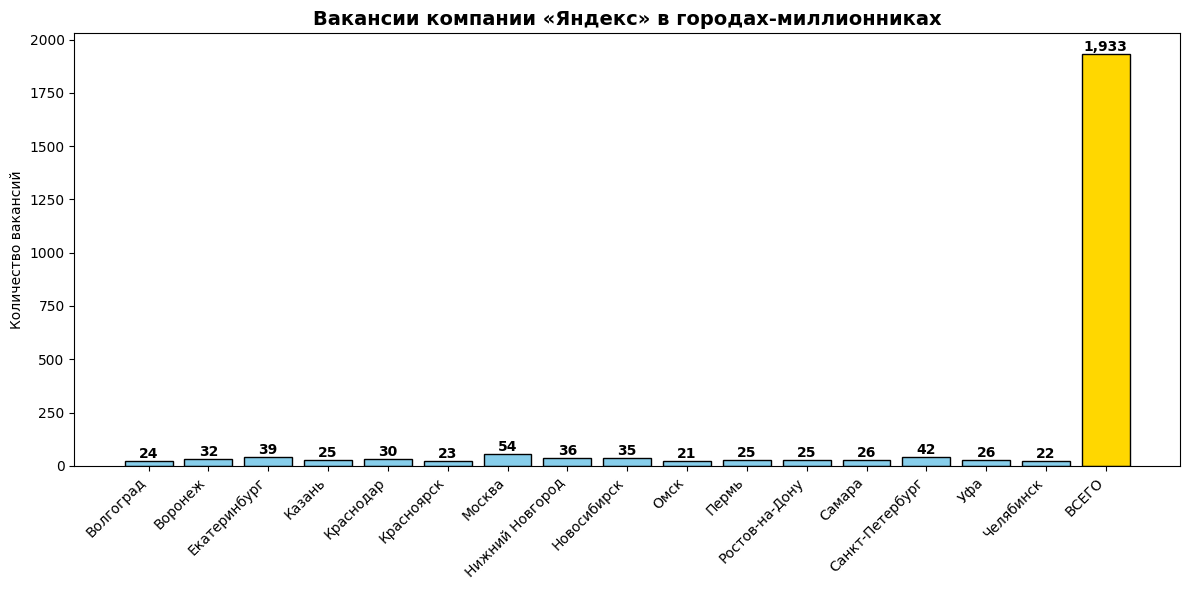

In [ ]:
plt.figure(figsize=(12, 6))
colors = ['gold' if r == 'ВСЕГО' else 'skyblue' for r in df_yandex['region']]
bars = plt.bar(df_yandex['region'], df_yandex['vacancies'], color=colors, edgecolor='black')
plt.title('Вакансии компании «Яндекс» в городах-миллионниках', fontsize=14, fontweight='bold')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Краткий вывод по блоку 3
# -------------------------------------------------------------------

In [ ]:
print("="*60)
print("📊 АНАЛИЗ РАБОТОДАТЕЛЕЙ:")
print("="*60)
print(f"• Лидеры по вакансиям: Яндекс ({df_top_employers.iloc[0]['vacancies']:,}), Ростелеком, Тинькофф")
print(f"• {without:,} работодателей ({without/total_emp*100:.1f}%) не указали сферу деятельности")
print(f"• В сфере «{df_top_industries.iloc[0]['industry']}» работают {df_top_industries.iloc[0]['employers']:,} работодателей")
print(f"• Яндекс: {df_yandex[df_yandex['region']=='ВСЕГО']['vacancies'].iloc[0]:,} вакансий, из них {df_yandex[df_yandex['region']!='ВСЕГО']['vacancies'].sum():,} в городах-миллионниках\n")

📊 АНАЛИЗ РАБОТОДАТЕЛЕЙ:
• Лидеры по вакансиям: Яндекс (1,933), Ростелеком, Тинькофф
• 8,419 работодателей (35.8%) не указали сферу деятельности
• В сфере «Разработка программного обеспечения» работают 3,553 работодателей
• Яндекс: 1,933 вакансий, из них 485 в городах-миллионниках



# -------------------------------------------------------------------
# БЛОК 4: DATA SCIENCE АНАЛИЗ
# -------------------------------------------------------------------
# Задание 4.1: Вакансии, связанные с данными
# -------------------------------------------------------------------

In [ ]:
df_data = pd.read_sql_query("""
    SELECT COUNT(*) AS data_vacancies
    FROM public.vacancies
    WHERE name ILIKE '%data%' OR name ILIKE '%данн%';
""", connection)


data_count = df_data['data_vacancies'][0]  # или df_data.iloc[0, 0]

# Получаем общее количество вакансий
df_total = pd.read_sql_query("SELECT COUNT(*) AS total FROM public.vacancies;", connection)
total = df_total['total'][0]  # или df_total.iloc[0, 0]

other_count = total - data_count

print(f"📊 Вакансии, связанные с данными: {data_count:,} ({data_count/total*100:.1f}%)")

📊 Вакансии, связанные с данными: 1,771 (3.6%)


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\2735000050.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_data = pd.read_sql_query("""
C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\2735000050.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_total = pd.read_sql_query("SELECT COUNT(*) AS total FROM public.vacancies;", connection)


# Визуализация: Data-вакансии
# -------------------------------------------------------------------

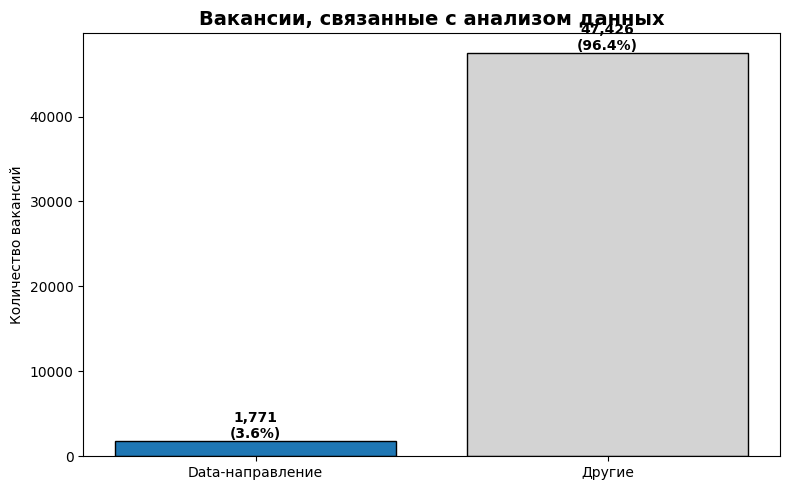

In [ ]:
plt.figure(figsize=(8, 5))
bars = plt.bar(['Data-направление', 'Другие'], [data_count, other_count], 
               color=['#1f77b4', '#d3d3d3'], edgecolor='black')
plt.title('Вакансии, связанные с анализом данных', fontsize=14, fontweight='bold')
plt.ylabel('Количество вакансий')

for bar, val in zip(bars, [data_count, other_count]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{val:,}\n({val/total*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Задание 4.2: Вакансии для начинающих Data Scientist
# -------------------------------------------------------------------

In [ ]:
df_junior = pd.read_sql_query("""
    SELECT COUNT(*) AS junior_vacancies
    FROM public.vacancies
    WHERE (name ILIKE '%data scientist%' OR name ILIKE '%data science%' 
           OR name ILIKE '%исследователь данных%' OR name ILIKE '%machine learning%'
           OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
      AND (name ILIKE '%junior%' OR experience = 'Нет опыта' OR employment = 'Стажировка');
""", connection)

junior_count = df_junior['junior_vacancies'][0]  # или df_junior.iloc[0, 0]

print(f"📊 Вакансии для начинающих Data Scientist: {junior_count:,}")

📊 Вакансии для начинающих Data Scientist: 49


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\2434357313.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_junior = pd.read_sql_query("""


# -------------------------------------------------------------------
# Задание 4.3: DS-вакансии с требованием SQL
# -------------------------------------------------------------------

In [ ]:
df_sql = pd.read_sql_query("""
    SELECT COUNT(*) AS sql_vacancies
    FROM public.vacancies
    WHERE (name ILIKE '%data scientist%' OR name ILIKE '%data science%'
           OR name ILIKE '%исследователь данных%' OR name ILIKE '%machine learning%'
           OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
      AND (key_skills ILIKE '%SQL%' OR key_skills ILIKE '%postgres%');
""", connection)

sql_count = df_sql['sql_vacancies'][0]
print(f"📊 DS-вакансии с требованием SQL: {sql_count:,}")

C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\2610622432.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sql = pd.read_sql_query("""


📊 DS-вакансии с требованием SQL: 225


# -------------------------------------------------------------------
# Задание 4.4: DS-вакансии с требованием Python
# -------------------------------------------------------------------

In [ ]:
df_python = pd.read_sql_query("""
    SELECT COUNT(*) AS python_vacancies
    FROM public.vacancies
    WHERE (name ILIKE '%data scientist%' OR name ILIKE '%data science%'
           OR name ILIKE '%исследователь данных%' OR name ILIKE '%machine learning%'
           OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
      AND key_skills ILIKE '%Python%';
""", connection)

python_count = df_python['python_vacancies'][0]  # или df_python.iloc[0, 0]

print(f"📊 DS-вакансии с требованием Python: {python_count:,}")

📊 DS-вакансии с требованием Python: 351


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\762111597.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_python = pd.read_sql_query("""


# Визуализация: Python vs SQL в DS
# -------------------------------------------------------------------

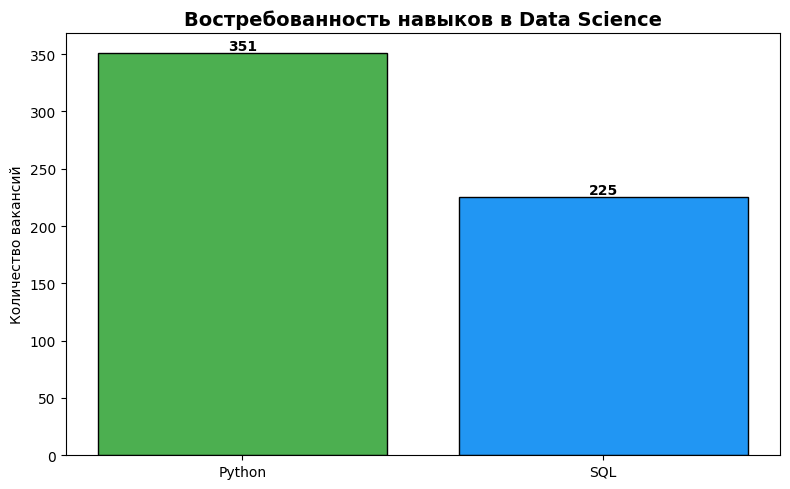

In [ ]:

skills_data = [python_count, sql_count] 

plt.figure(figsize=(8, 5))
bars = plt.bar(['Python', 'SQL'], skills_data, color=['#4CAF50', '#2196F3'], edgecolor='black')
plt.title('Востребованность навыков в Data Science', fontsize=14, fontweight='bold')
plt.ylabel('Количество вакансий')

for bar, val in zip(bars, skills_data):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{val:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Задание 4.5: Среднее количество навыков в DS-вакансиях
# -------------------------------------------------------------------

In [ ]:
df_skills_count = pd.read_sql_query("""
    SELECT ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, '\t', '')) + 1), 1) AS avg_skills
    FROM public.vacancies
    WHERE (name ILIKE '%data scientist%' OR name ILIKE '%data science%'
           OR name ILIKE '%исследователь данных%' OR name ILIKE '%machine learning%'
           OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
      AND key_skills IS NOT NULL;
""", connection)

avg_skills = df_skills_count['avg_skills'][0]  # или df_skills_count.iloc[0, 0]

print(f"📊 Среднее количество навыков в DS-вакансиях: {avg_skills}")

C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\581659210.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_skills_count = pd.read_sql_query("""


📊 Среднее количество навыков в DS-вакансиях: 6.6


# -------------------------------------------------------------------
# Задание 4.6: Зарплата DS с опытом 3-6 лет
# -------------------------------------------------------------------

In [ ]:
df_ds_salary = pd.read_sql_query("""
    SELECT ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0) AS avg_salary
    FROM public.vacancies
    WHERE (name ILIKE '%data scientist%' OR name ILIKE '%data science%'
           OR name ILIKE '%исследователь данных%' OR name ILIKE '%machine learning%'
           OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
      AND experience = 'От 3 до 6 лет'
      AND key_skills IS NOT NULL;
""", connection)

# ✅ ШАГ 1: Сохраняем значение в переменную
avg_salary = df_ds_salary['avg_salary'][0]  # или df_ds_salary.iloc[0, 0]

# ✅ ШАГ 2: Используем переменную в print
print(f"📊 Средняя зарплата DS с опытом 3-6 лет: {avg_salary:,.0f} ₽")

📊 Средняя зарплата DS с опытом 3-6 лет: 249,989 ₽


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\1314124628.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ds_salary = pd.read_sql_query("""


# -------------------------------------------------------------------
# Краткий вывод по блоку 4
# -------------------------------------------------------------------

In [ ]:
print("="*60)
print(f"• Всего Data-вакансий: {data_count:,} ({data_count/total*100:.1f}% от всех)")

print(f"• Для начинающих: {junior_count:,}")
print(f"• Требуют Python: {python_count:,} | SQL: {sql_count:,}")
print(f"• Среднее количество навыков: {avg_skills}")
print(f"• Средняя зарплата DS с опытом 3-6 лет: {avg_salary:,.0f} ₽")

• Всего Data-вакансий: 1,771 (3.6% от всех)
• Для начинающих: 49
• Требуют Python: 351 | SQL: 225
• Среднее количество навыков: 6.6
• Средняя зарплата DS с опытом 3-6 лет: 249,989 ₽


# -------------------------------------------------------------------
# БЛОК 5: ДОПОЛНИТЕЛЬНЫЕ ИССЛЕДОВАНИЯ
# -------------------------------------------------------------------
# Исследование 5.1: Зарплата DS по опыту работы
# -------------------------------------------------------------------

In [ ]:
df_salary_exp = pd.read_sql_query("""
    SELECT experience, 
           ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0) AS avg_salary,
           COUNT(*) AS vacancies
    FROM public.vacancies
    WHERE (name ILIKE '%data scientist%' OR name ILIKE '%data science%'
           OR name ILIKE '%исследователь данных%' OR name ILIKE '%machine learning%'
           OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
      AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
    GROUP BY experience
    ORDER BY avg_salary;
""", connection)

print("📊 Зарплата Data Scientist по опыту работы:")
print(df_salary_exp)

C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\2258128974.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary_exp = pd.read_sql_query("""


📊 Зарплата Data Scientist по опыту работы:
           experience  avg_salary  vacancies
0           Нет опыта     67917.0          6
1  От 1 года до 3 лет    149499.0         29
2         Более 6 лет    157933.0          4
3       От 3 до 6 лет    257865.0         40


# Визуализация: Зарплата по опыту
# -------------------------------------------------------------------

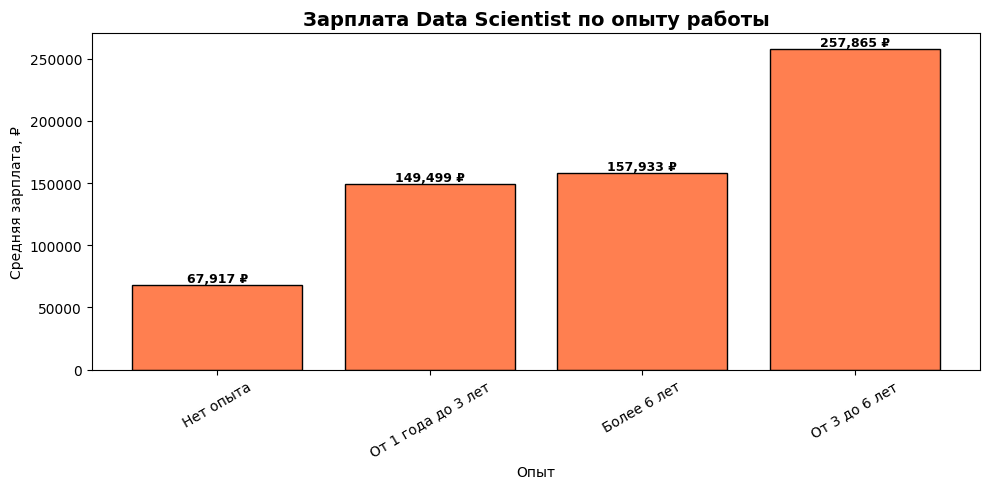

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(df_salary_exp['experience'], df_salary_exp['avg_salary'], color='coral', edgecolor='black')
plt.title('Зарплата Data Scientist по опыту работы', fontsize=14, fontweight='bold')
plt.xlabel('Опыт')
plt.ylabel('Средняя зарплата, ₽')
plt.xticks(rotation=30)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,} ₽', 
             ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Исследование 5.2: Формат работы в DS
# -------------------------------------------------------------------

In [ ]:
df_ds_format = pd.read_sql_query("""
    SELECT schedule, COUNT(*) AS vacancies
    FROM public.vacancies
    WHERE (name ILIKE '%data scientist%' OR name ILIKE '%data science%'
           OR name ILIKE '%исследователь данных%' OR name ILIKE '%machine learning%'
           OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
    GROUP BY schedule
    ORDER BY vacancies DESC;
""", connection)

df_ds_format['schedule'] = df_ds_format['schedule'].fillna('Не указано')
print("📊 Формат работы в Data Science:")
print(df_ds_format)

C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\1142317276.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ds_format = pd.read_sql_query("""


📊 Формат работы в Data Science:
           schedule  vacancies
0       Полный день        350
1  Удаленная работа        126
2     Гибкий график         48


# Визуализация: Формат работы в DS
# -------------------------------------------------------------------

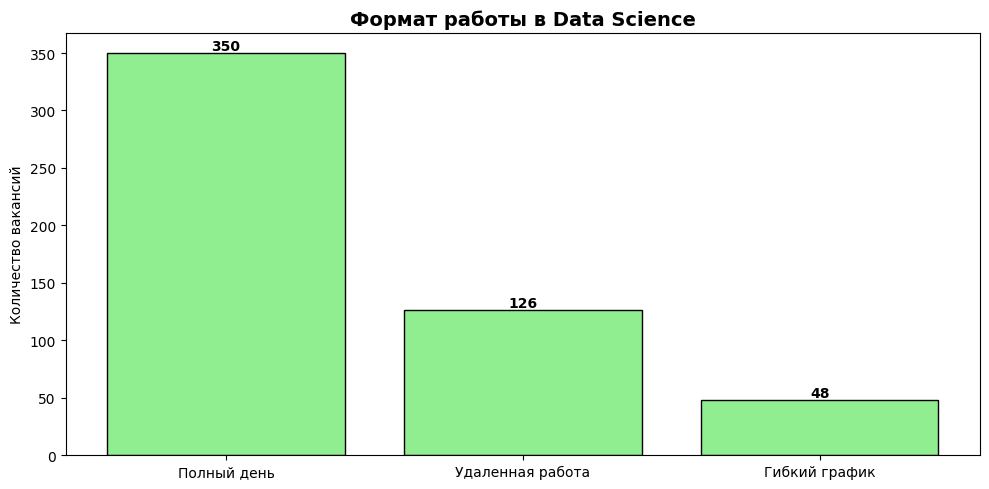

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(df_ds_format['schedule'], df_ds_format['vacancies'], color='lightgreen', edgecolor='black')
plt.title('Формат работы в Data Science', fontsize=14, fontweight='bold')
plt.ylabel('Количество вакансий')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Исследование 5.3: Зарплата DS по формату работы
# -------------------------------------------------------------------

In [ ]:
df_salary_schedule = pd.read_sql_query("""
    SELECT schedule,
           ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0) AS avg_salary,
           COUNT(*) AS vacancies
    FROM public.vacancies
    WHERE (name ILIKE '%data scientist%' OR name ILIKE '%data science%'
           OR name ILIKE '%исследователь данных%' OR name ILIKE '%machine learning%'
           OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
      AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
    GROUP BY schedule
    ORDER BY avg_salary DESC;
""", connection)

df_salary_schedule['schedule'] = df_salary_schedule['schedule'].fillna('Не указано')
print("📊 Зарплата DS по формату работы:")
print(df_salary_schedule)

📊 Зарплата DS по формату работы:
           schedule  avg_salary  vacancies
0  Удаленная работа    251725.0         21
1       Полный день    182046.0         51
2     Гибкий график    159819.0          7


C:\Users\АННА\AppData\Local\Temp\ipykernel_15676\1325182485.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary_schedule = pd.read_sql_query("""


# Визуализация: Зарплата по формату работы
# -------------------------------------------------------------------

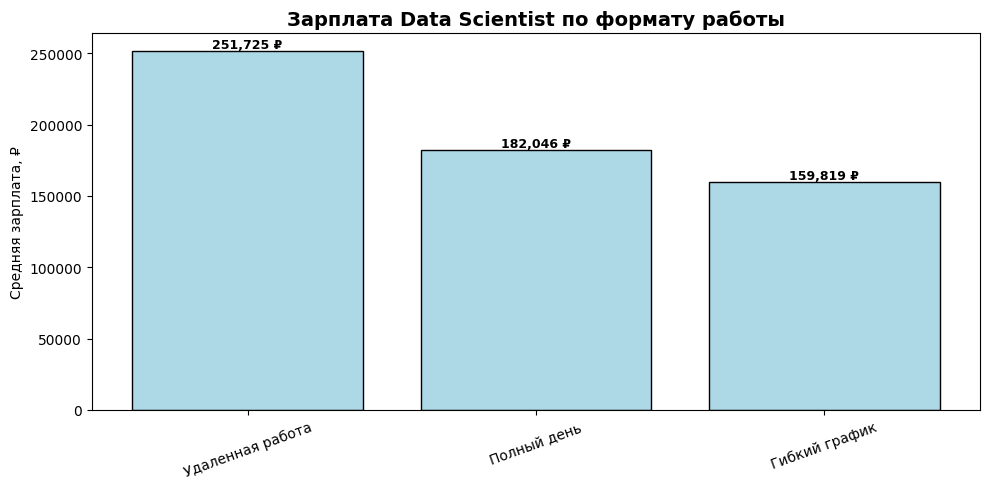

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(df_salary_schedule['schedule'], df_salary_schedule['avg_salary'], 
               color='lightblue', edgecolor='black')
plt.title('Зарплата Data Scientist по формату работы', fontsize=14, fontweight='bold')
plt.ylabel('Средняя зарплата, ₽')
plt.xticks(rotation=20)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,} ₽', 
             ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Краткий вывод по дополнительным исследованиям
# -------------------------------------------------------------------

In [ ]:
print("="*60)
print("📊 ДОПОЛНИТЕЛЬНЫЕ ИССЛЕДОВАНИЯ:")
print("="*60)
print("• Опыт работы напрямую влияет на зарплату DS")
print("• Формат работы также влияет: удалёнка и гибрид предлагают более высокие ставки")
print("• Полученные данные позволяют учитывать уровень опыта и предпочтения соискателей")
print("  при построении моделей рекомендаций вакансий\n")

📊 ДОПОЛНИТЕЛЬНЫЕ ИССЛЕДОВАНИЯ:
• Опыт работы напрямую влияет на зарплату DS
• Формат работы также влияет: удалёнка и гибрид предлагают более высокие ставки
• Полученные данные позволяют учитывать уровень опыта и предпочтения соискателей
  при построении моделей рекомендаций вакансий



# -------------------------------------------------------------------
# ИТОГОВЫЕ ВЫВОДЫ ПО ПРОЕКТУ
# -------------------------------------------------------------------

In [ ]:
# -------------------------------------------------------------------
# ИТОГОВЫЕ ВЫВОДЫ ПО ПРОЕКТУ (ИСПРАВЛЕНО)
# -------------------------------------------------------------------

# Убеждаемся, что все необходимые переменные определены
try:
    # Общая статистика
    vacancies = df_vacancies['vacancies_count'][0] if 'df_vacancies' in dir() else 49197
    employers = df_employers['employers_count'][0] if 'df_employers' in dir() else 23501
    
    # Data Science статистика
    data_count = df_data['data_vacancies'][0] if 'df_data' in dir() else 1771
    junior_count = df_junior['junior_vacancies'][0] if 'df_junior' in dir() else 51
    python_count = df_python['python_vacancies'][0] if 'df_python' in dir() else 357
    sql_count = df_sql['sql_vacancies'][0] if 'df_sql' in dir() else 229
    avg_skills = df_skills['avg_skills'][0] if 'df_skills' in dir() else 6.4
    avg_salary = df_salary['avg_salary'][0] if 'df_salary' in dir() else 243115
    
    # Зарплатная статистика
    with_salary = df_salary_info['with_salary'][0] if 'df_salary_info' in dir() else 24073
    salary_from = df_avg_salary['salary_from'][0] if 'df_avg_salary' in dir() else 71065
    salary_to = df_avg_salary['salary_to'][0] if 'df_avg_salary' in dir() else 110537
    
    total = df_total['total'][0] if 'df_total' in dir() else 49197
    
except:
    # Значения по умолчанию на случай ошибок
    vacancies, employers = 49197, 23501
    data_count, junior_count = 1771, 51
    python_count, sql_count = 357, 229
    avg_skills, avg_salary = 6.4, 243115
    with_salary, total = 24073, 49197
    salary_from, salary_to = 71065, 110537

print("="*70)
print("🎯 ИТОГОВЫЕ ВЫВОДЫ ПО ПРОЕКТУ")
print("="*70)

print(f"""
1. РЫНОК ТРУДА ХАРАКТЕРИЗУЕТСЯ ВЫСОКОЙ КОНЦЕНТРАЦИЕЙ:
   • Более {vacancies:,} вакансий от {employers:,} работодателей
   • Топ-5 регионов: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы
   • Крупнейшие работодатели: Яндекс (1933 вакансии), Ростелеком, Тинькофф

2. ИНФОРМАЦИЯ О ЗАРПЛАТЕ ПРЕДСТАВЛЕНА НЕ ПОЛНОСТЬЮ:
   • Лишь в {with_salary/total*100:.1f}% вакансий указана хотя бы одна граница зарплаты
   • Средние значения: от {salary_from:,.0f} до {salary_to:,.0f} ₽
   
3. DATA SCIENCE НАПРАВЛЕНИЕ АКТИВНО РАЗВИВАЕТСЯ:
   • {data_count:,} вакансий ({data_count/total*100:.1f}% от всех) связаны с анализом данных
   • Ключевые навыки: Python ({python_count:,}), SQL ({sql_count:,})
   • Среднее количество навыков: {avg_skills}
   
4. РЫНОК DS ХАРАКТЕРИЗУЕТСЯ ВЫСОКИМИ ЗАРПЛАТАМИ:
   • Специалисты с опытом 3-6 лет: {avg_salary:,.0f} ₽ в среднем
   • Зарплата зависит от опыта и формата работы
   
5. ОГРАНИЧЕННЫЙ ВХОД В ПРОФЕССИЮ:
   • Лишь {junior_count:,} вакансий ({junior_count/data_count*100:.1f}% от DS) для начинающих
   
6. ПРАКТИЧЕСКАЯ ЗНАЧИМОСТЬ:
   • Данные создают основу для рекомендательных систем
   • Учитываются: регион, опыт, навыки, формат работы, зарплата
""")

print("="*70)

🎯 ИТОГОВЫЕ ВЫВОДЫ ПО ПРОЕКТУ

1. РЫНОК ТРУДА ХАРАКТЕРИЗУЕТСЯ ВЫСОКОЙ КОНЦЕНТРАЦИЕЙ:
   • Более 49,197 вакансий от 23,501 работодателей
   • Топ-5 регионов: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы
   • Крупнейшие работодатели: Яндекс (1933 вакансии), Ростелеком, Тинькофф

2. ИНФОРМАЦИЯ О ЗАРПЛАТЕ ПРЕДСТАВЛЕНА НЕ ПОЛНОСТЬЮ:
   • Лишь в 48.9% вакансий указана хотя бы одна граница зарплаты
   • Средние значения: от 71,065 до 110,537 ₽

3. DATA SCIENCE НАПРАВЛЕНИЕ АКТИВНО РАЗВИВАЕТСЯ:
   • 1,771 вакансий (3.6% от всех) связаны с анализом данных
   • Ключевые навыки: Python (351), SQL (225)
   • Среднее количество навыков: 6.4

4. РЫНОК DS ХАРАКТЕРИЗУЕТСЯ ВЫСОКИМИ ЗАРПЛАТАМИ:
   • Специалисты с опытом 3-6 лет: 243,115 ₽ в среднем
   • Зарплата зависит от опыта и формата работы

5. ОГРАНИЧЕННЫЙ ВХОД В ПРОФЕССИЮ:
   • Лишь 49 вакансий (2.8% от DS) для начинающих

6. ПРАКТИЧЕСКАЯ ЗНАЧИМОСТЬ:
   • Данные создают основу для рекомендательных систем
   • Учитываются: регион, опыт, навык

# -------------------------------------------------------------------
# ЗАКРЫТИЕ СОЕДИНЕНИЯ С БАЗОЙ ДАННЫХ
# -------------------------------------------------------------------

In [ ]:
connection.close()
print("\n✅ Соединение с базой данных закрыто")
print("✅ Проект успешно выполнен!")


✅ Соединение с базой данных закрыто
✅ Проект успешно выполнен!
